In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data = pd.read_csv("Problem Statement - Blinkit - data.csv")

# Displaying the summary statistics
print(data[['metered_price','upfront_price','distance','duration']].describe())

       metered_price  upfront_price       distance      duration
count    4923.000000    3409.000000    4943.000000   4943.000000
mean     7998.471296    4160.095747    9769.223144   1566.230629
std     15815.850352   17015.711912   10912.426401   1650.329858
min         2.000000       2.000000       0.000000      0.000000
25%         5.380000       4.200000    3785.500000    604.000000
50%        13.350000       6.600000    7140.000000   1054.000000
75%     10991.670000    4000.000000   11953.000000   1929.500000
max    194483.520000  595000.000000  233190.000000  22402.000000


In [61]:
# Calculating the discrepancy

data['price_discrepancy'] = ((data['metered_price'] - data['upfront_price']).abs() / data['upfront_price'])*100


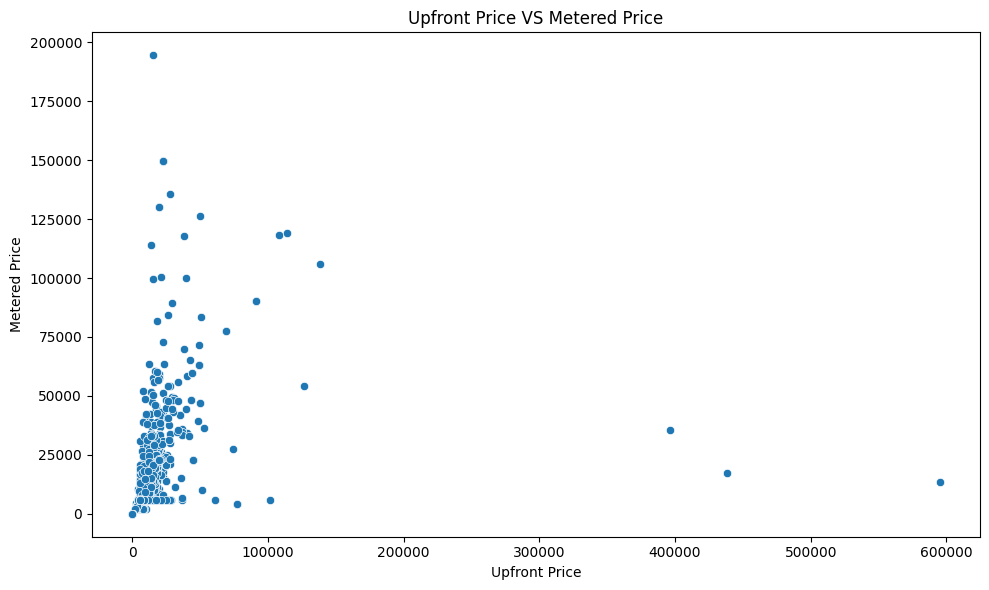

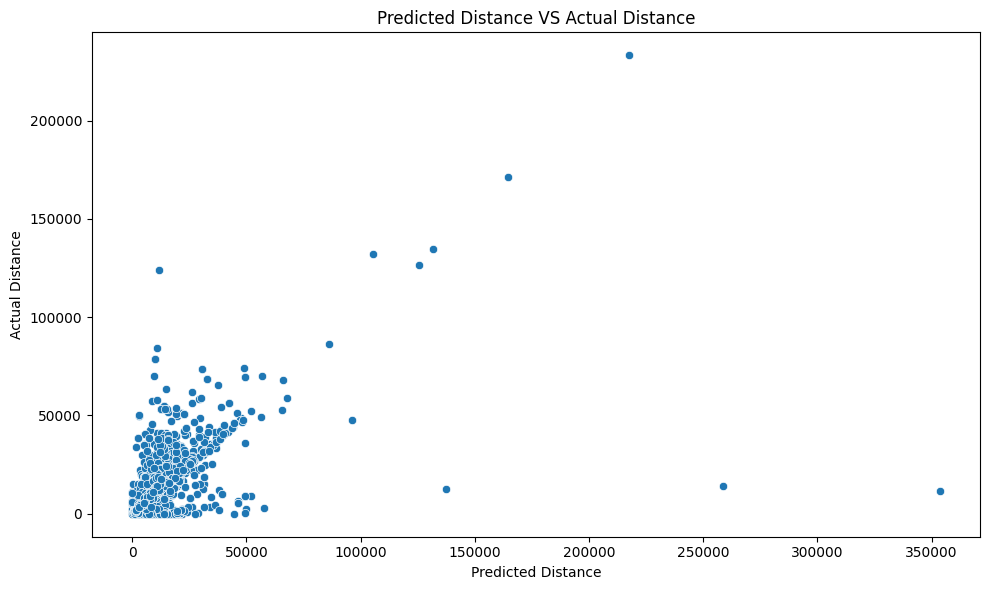

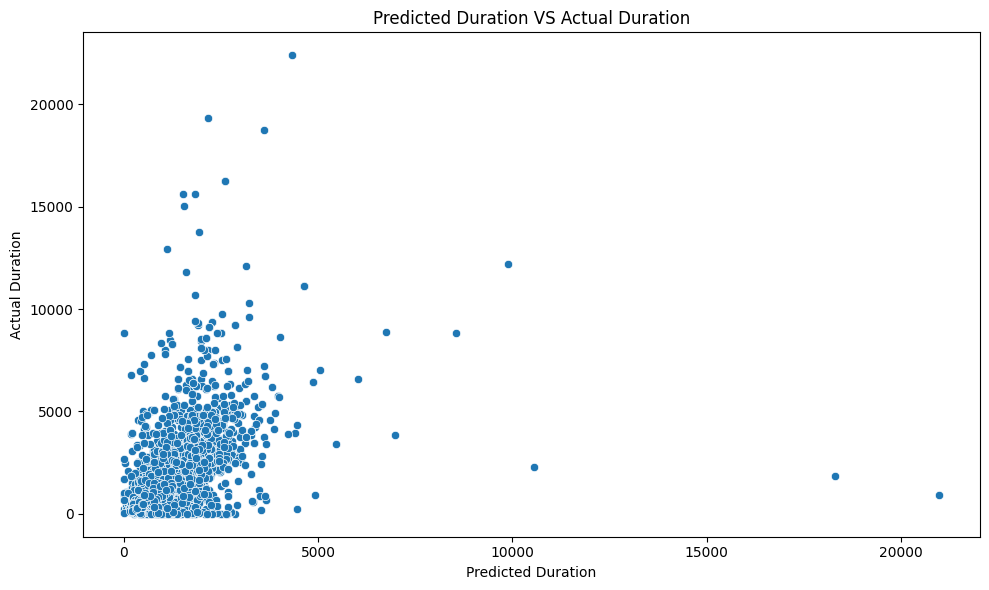

In [45]:
# Scatter Plot - "upfront_price" vs metered_price to visualize alignment

plt.figure(figsize=(10,6))
sns.scatterplot(x='upfront_price',y='metered_price',data=data)
plt.title('Upfront Price VS Metered Price')
plt.xlabel('Upfront Price')
plt.ylabel('Metered Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='predicted_distance',y='distance',data=data)
plt.title('Predicted Distance VS Actual Distance')
plt.xlabel('Predicted Distance')
plt.ylabel('Actual Distance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='predicted_duration',y='duration',data=data)
plt.title('Predicted Duration VS Actual Duration')
plt.xlabel('Predicted Duration')
plt.ylabel('Actual Duration')
plt.tight_layout()
plt.show()


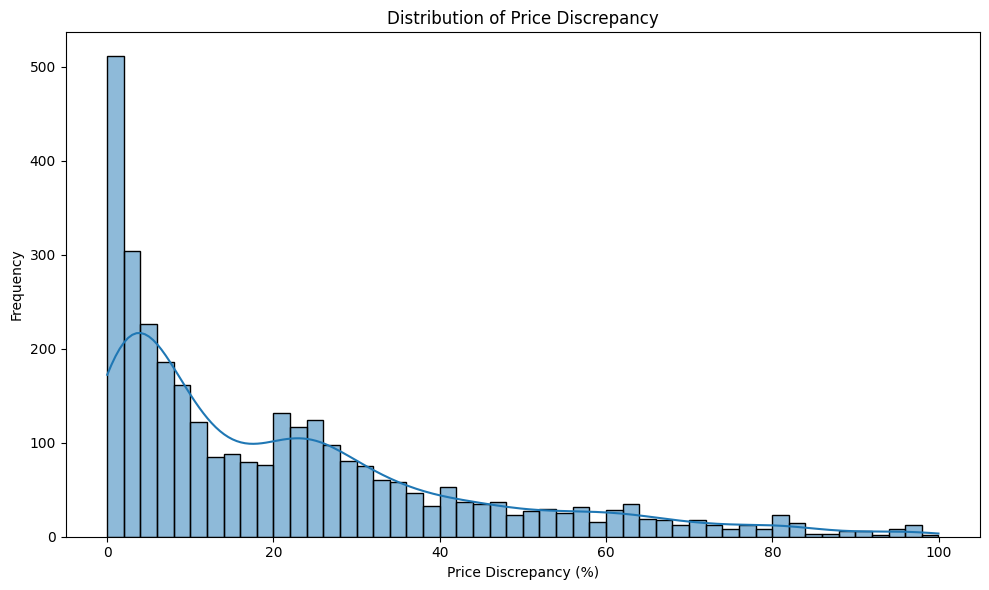

In [66]:
# Histogram - To show distribution of "price_discrepancy"

plt.figure(figsize=(10,6))
sns.histplot(data[data['price_discrepancy']<=100]['price_discrepancy'],bins=50,kde=True)
plt.title('Distribution of Price Discrepancy')
plt.xlabel('Price Discrepancy (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

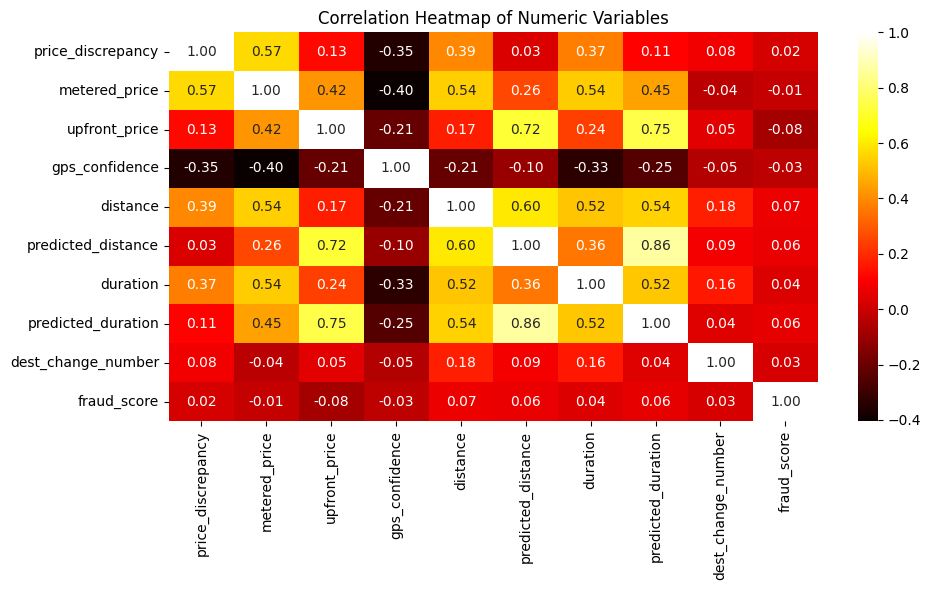

In [47]:
# Correlation Analysis - Examining correlations between "price_discrepancy" and other numerical varibales like
# "gps_confidence", "predicted_distance", "predicted_duration", "dest_change_number"

correlation_matrix = data[['price_discrepancy','metered_price','upfront_price','gps_confidence','distance','predicted_distance','duration','predicted_duration','dest_change_number','fraud_score']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='hot',fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

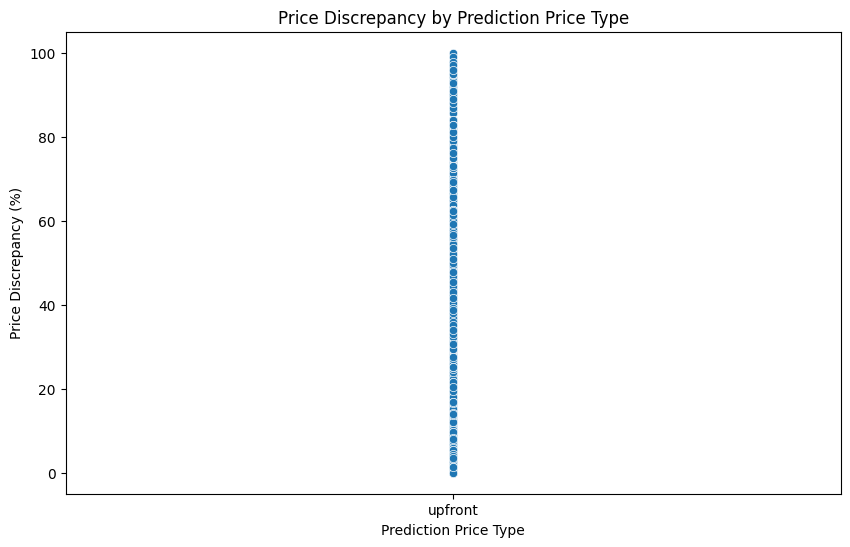

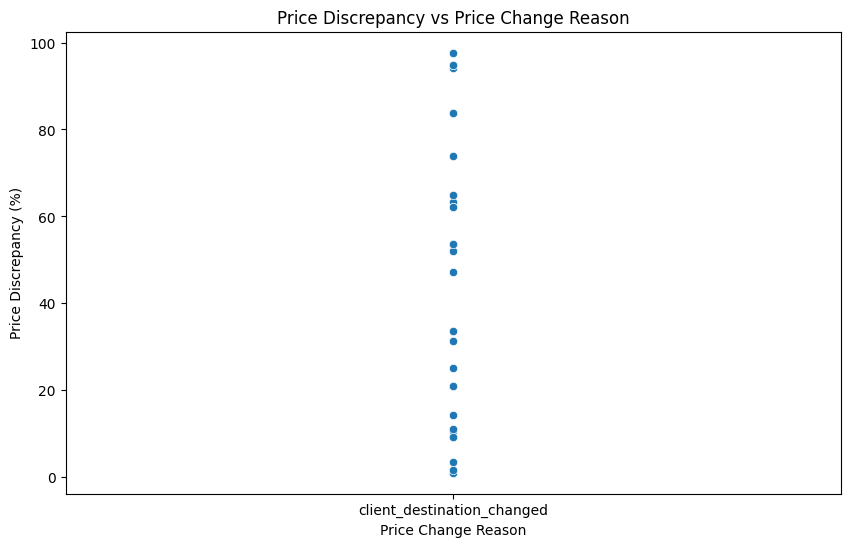

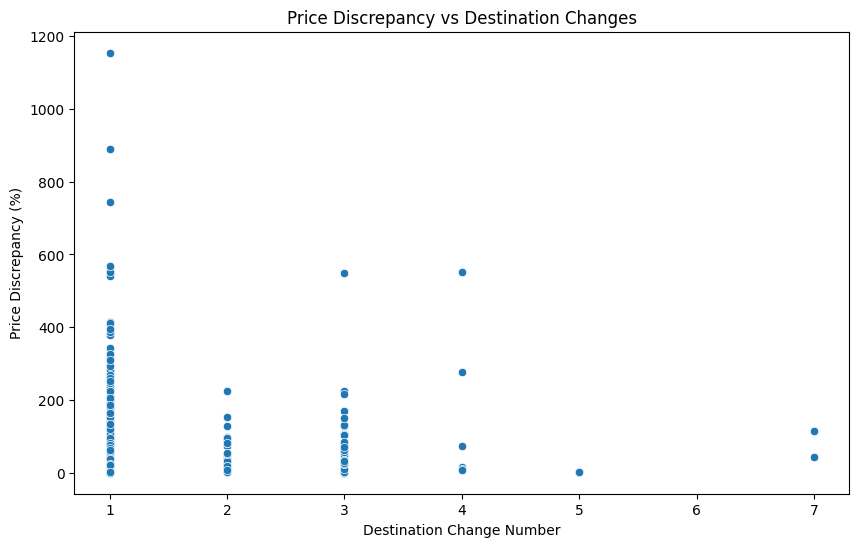

In [68]:
# Box plot for prediction_price_type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prediction_price_type', y='price_discrepancy', data=data[data['price_discrepancy']<=100])
plt.title('Price Discrepancy by Prediction Price Type')
plt.xlabel('Prediction Price Type')
plt.ylabel('Price Discrepancy (%)')
plt.show()

# Analysis of change_reason_pricing
plt.figure(figsize=(10, 6))
sns.scatterplot(x='change_reason_pricing', y='price_discrepancy', data=data[data['price_discrepancy']<=100])
plt.title('Price Discrepancy vs Price Change Reason')
plt.xlabel('Price Change Reason')
plt.ylabel('Price Discrepancy (%)')
plt.show()

# Analysis of destination changes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dest_change_number', y='price_discrepancy', data=data)
plt.title('Price Discrepancy vs Destination Changes')
plt.xlabel('Destination Change Number')
plt.ylabel('Price Discrepancy (%)')
plt.show()